**<p style='text-align: right;'>Ver. 2.5.5</p>**

# Introductory Applied Machine Learning (IAML) Coursework - Semester 2, 2023-24

### Author: Fengxiang He, Waylon Li, Hiroshi Shimodaira and Rohan Gorantla

## Important Instructions

#### It is important that you follow the instructions below carefully for things to work properly.

You need to set up and activate your environment as you would do for your labs, see Learn section on Labs.  **You will need to use Noteable to create the files you will submit (the Jupyter (IPynthon) Notebook and the PDF)**.  Do **NOT** create the PDF in some other way, we will not be able to mark it.  If you want to develop your answers in your own environment, you should make sure you are using the same packages we are using, by running the cell which does imports below.

Read the instructions in this notebook carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the required code/markdown cell. **If you are not familiar with markdown, here's a tutorial: [click here](https://www.markdowntutorial.com/).**

- We will use the IAML Learn page for any announcements, updates, and FAQs on this assignment. Please ***visit the page frequently*** to find the latest information/changes.
- Data files that you will be using are included in the coursework zip file that you have downloaded from the Learn assignment page for this coursework.
- Some of the topics in this coursework are covered in week 7 and 8 of the course. Focus first on questions or topics that you have covered already, and come back to the other questions as the lectures progress.
- Keep your answers brief and concise.
- Make sure to show all your code/working.
- All the figures you present should have axis labels, titles, and grid lines unless specified explicitly. If you think grid lines spoiling readability, you can adjust the line width and/or line style. Figures should not be too small to read.
- Write readable code. While we do not expect you to follow PEP8 to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. Do use inline comments when doing something non-standard.
- When asked to present numerical values, make sure to represent real numbers in the appropriate precision corresponding to your answer.
- When you use libraries specified in this coursework, you should use the default parameters unless specified explicitly.
- The criteria on which you will be judged include the quality of the textual answers and/or any plots asked for. For higher marks, when asked you need to give good and concise discussions based on experiments and theories using your own words.

- You will see <html>\\pagebreak</html> at the start of each subquestion.  ***Do not remove these, if you do we will not be able to mark your coursework.***

#### Good Scholarly Practice
Please remember the University requirement regarding all assessed work for credit. Details about this can be found at:
http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct

Specifically, this assignment should be your own individual work. We will employ tools for detecting misconduct.

Moreover, please note that Piazza is NOT a forum for discussing the solutions of the assignment. You may ask private questions. You can use the office hours to ask questions.

### SUBMISSION Mechanics
This assignment will account for 30% of your final mark. We ask you to submit answers to all questions.

You will submit (1) a PDF of your Notebook and (2) the Notebook itself via Gradescope.  Your grade will be based on the PDF, we will only use the Notebook if we need to see details.  **You must use the following procedure to create the materials to submit**.

1. Make sure your Notebook, the helper file, and the datasets are in Noteable and will run.  If you developed your answers in Noteable, this is already done.

2. Select **Kernel->Restart & Run All** to create a clean copy of your submission, this will run the cells in order from top to bottom.  This may take a while (a few hours) to complete, ensure that all the output and plots have complete before you proceed.

3. Select **File->Download as->PDF via LaTeX (.pdf)** and wait for the PDF to be created and downloaded.

4. Select **File->Download as->Notebook (.ipynb)**

5. You now should have in your download folder the pdf and the notebook.  Rename them sNNNNNNN.pdf and sNNNNNNN.ipynb, where sNNNNNNN is your matriculation number (student number).

**Details on submission instructions will be announced and documented on Learn before the deadline**.

The submission deadline for this assignment is **Monday 1st April 2024 at 4pm UK time (UTC)**.  Don't leave it to the last minute!


#### IMPORTS
Execute the cell below to import all packages you will be using for this assignment.  If you are not using Noteable, make sure the python and package version numbers reported match the python and package numbers, which can be checked by running the following cell. The Python version does not need to be the same, but it should be $3.9.p$, where $p \ge 12$.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.patches as mpatches
import copy

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from pandas.plotting import parallel_coordinates

# You may add other libraries here or in your other cells as needed.



\pagebreak

# Question 1: Experiments with a stock price  data set

#### 65 marks out of 110 for this coursework

The stock price data set we use in this coursework is a stock price of a company for the period between 2000 and 2024, consisting of four historical prices ('Open', 'High', 'Low', 'Close', which denote the opening, highest, lowest, and closing prices on the trading day, respectively) and trading volume. For the convenience of the coursework, we have added some features to the data set. They are four [technical indicators](https://python.stockindicators.dev/indicators/) (RSI, SMA, MACD, ADX), 'Tomorrow', and 'Target'. 'Tomorrow' holds the closing price of next trading day, which we will use for price prediction, and 'Target' is a binary indicator (label), which takes 1 if 'Tomorrow' is higher than 'Close', 0 otherwise, which we will use for the prediction of movement direction.

***Loading data***
Make sure that you have the data set files "dset_q1a.csv", "dset_q1a_extend", and "dset_q1b.csv" in your environment. We will use the first file in the following sub questions except the last two subquestions 1.7 and 1.8. Run the following cell to load the first file.

In [2]:
# Load the data set "dset_q1a.csv"
df = pd.read_csv("dset_q1a.csv", index_col='Date', parse_dates=True)
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')
df.head()

Open     High       Low     Close    Volume        SMA  \
Date                                                                     
2000-01-03  58.68750  59.3125  56.00000  58.28125  53228400  54.215625   
2000-01-04  56.78125  58.5625  56.12500  56.31250  54119000  54.645313   
2000-01-05  55.56250  58.1875  54.68750  56.90625  64059600  55.165625   
2000-01-06  56.09375  56.9375  54.18750  55.00000  54976600  55.621875   
2000-01-07  54.31250  56.1250  53.65625  55.71875  62013600  56.089062   

                  RSI      MACD        ADX  Tomorrow  Target  
Date                                                          
2000-01-03  71.898153  3.292083  38.756214  56.31250       0  
2000-01-04  60.689975  2.986482  37.855621  56.90625       1  
2000-01-05  62.584360  2.760381  35.986452  55.00000       0  
2000-01-06  53.645906  2.399714  33.922343  55.71875       1  
2000-01-07  56.186787  2.147129  31.661532  56.12500       1

# ========== Question 1.1 --- [5 marks] ==========
###  Describe the main properties of the data:
1. [Code] Display the shape of the data
2. [Code] Display the range of the dataframe index
3. [Code] What data are presented and what types of data are they? Display the information using **pandas.DataFrame.info**.
4. [Code] Display the highest price, the lowest price, and the mean of the closing price ('Close') for each year in the data. (Hint: the highest price for each year is obtained from the price 'High'.)

\pagebreak
## Your answers for Question 1.1

In [3]:
shape_of_data = df.shape
shape_of_data

(6037, 11)

In [4]:
index_range = (df.index.min(), df.index.max())
index_range

(Timestamp('2000-01-03 00:00:00'), Timestamp('2023-12-29 00:00:00'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      6037 non-null   float64
 1   High      6037 non-null   float64
 2   Low       6037 non-null   float64
 3   Close     6037 non-null   float64
 4   Volume    6037 non-null   int64  
 5   SMA       6037 non-null   float64
 6   RSI       6037 non-null   float64
 7   MACD      6037 non-null   float64
 8   ADX       6037 non-null   float64
 9   Tomorrow  6037 non-null   float64
 10  Target    6037 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 566.0 KB


In [6]:
annual_summary = df.groupby(df.index.year).agg({'High': 'max', 'Low': 'min', 'Close': 'mean'})

annual_summary.rename(columns={'High': 'Highest Price', 'Low': 'Lowest Price', 'Close': 'Mean Closing Price'}, inplace=True)
annual_summary

Highest Price  Lowest Price  Mean Closing Price
Date                                                 
2000      59.312500     20.156250           38.110243
2001      38.075001     21.437500           31.271087
2002      35.310001     20.705000           27.274524
2003      30.000000     22.549999           26.101429
2004      30.200001     24.010000           27.124762
2005      28.250000     23.820000           25.871270
2006      30.260000     21.459999           26.290359
2007      37.500000     26.600000           30.446773
2008      35.959999     17.500000           26.647391
2009      31.500000     14.870000           22.976786
2010      31.580000     22.730000           27.058571
2011      29.459999     23.650000           26.052341
2012      32.950001     26.260000           29.820960
2013      38.980000     26.280001           32.491905
2014      50.049999     34.630001           42.453492
2015      56.849998     39.720001           46.714286
2016      64.099998     48.040001           55.259325
2017      87.500000     61.950001           71.984024
2018     116.180000     83.830002          101.033984
2019     159.550003     97.199997          130.382024
2020     232.860001    132.520004          193.026126
2021     349.670013    211.940002          275.940754
2022     338.000000    213.429993          268.917091
2023     384.299988    219.350006          313.951001

\pagebreak

# ========== Question 1.2 --- [8 marks] ==========
Perform an *exploratory data analysis* on the dataset by studying the following:
1. [Code and text] Plot the stock market closing price ('Close') and analyse the plot by identifying key trends and volatility patterns
2. [Code] For the period from the beginning of year 2021 until the end of 2022, plot the volumes ('Volume'), where you show months on the x-axis and indicate the positions of the highest and lowest values for the period.
3. [Code and text] Plot a pairplot for the dataset features using the seaborn **pairplot**. Examine and describe specific correlations and distributions among the features. Highlight any strong or weak correlations observed between pairs of features and discuss potential implications for further analysis.
4. [Code] Plot the correlation matrix for the dataset features.
5. [Text] Based on the results you obtained in 3 and 4 above, comment on the relationships among the features present in the dataset.

\pagebreak
## Your answers for Question 1.2

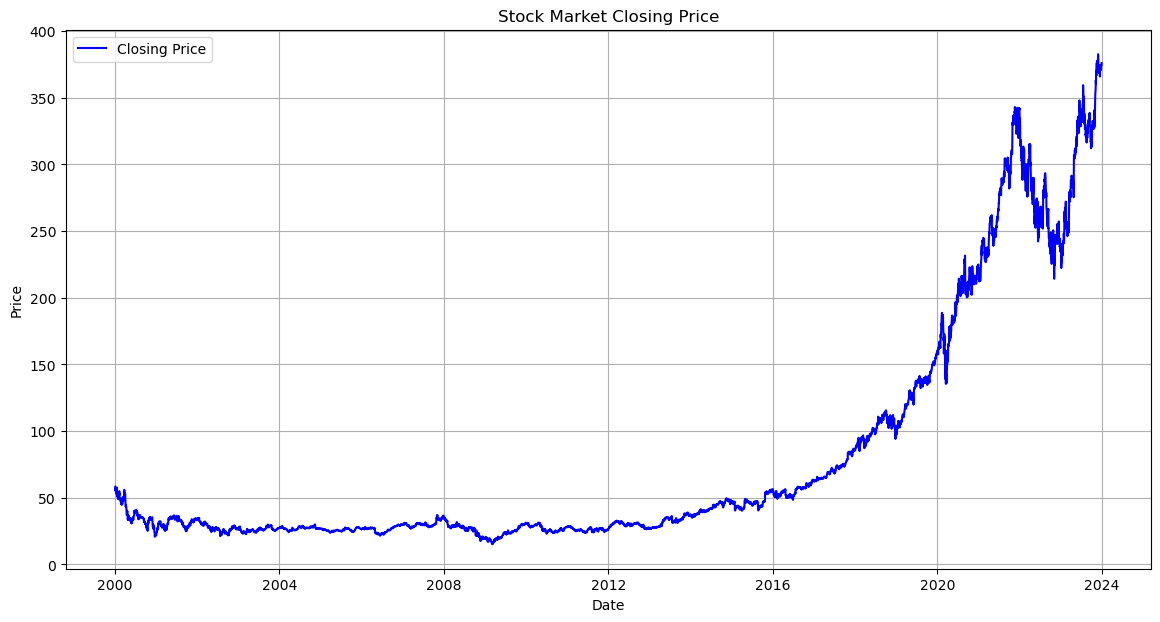

In [7]:
#(1) Your code and text goes here

# Plotting the 'Close' prices without the volatility plot
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Closing Price', color='blue')

# Adding title and labels
plt.title('Stock Market Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

There is a sideway movement from 2000 untul 2016 at the level of below 50, and then the uproar in the closing price from 2016 to 2020, then another increase until around 2022, with a drop until around 2023, and now it gets back up again reaching a new high

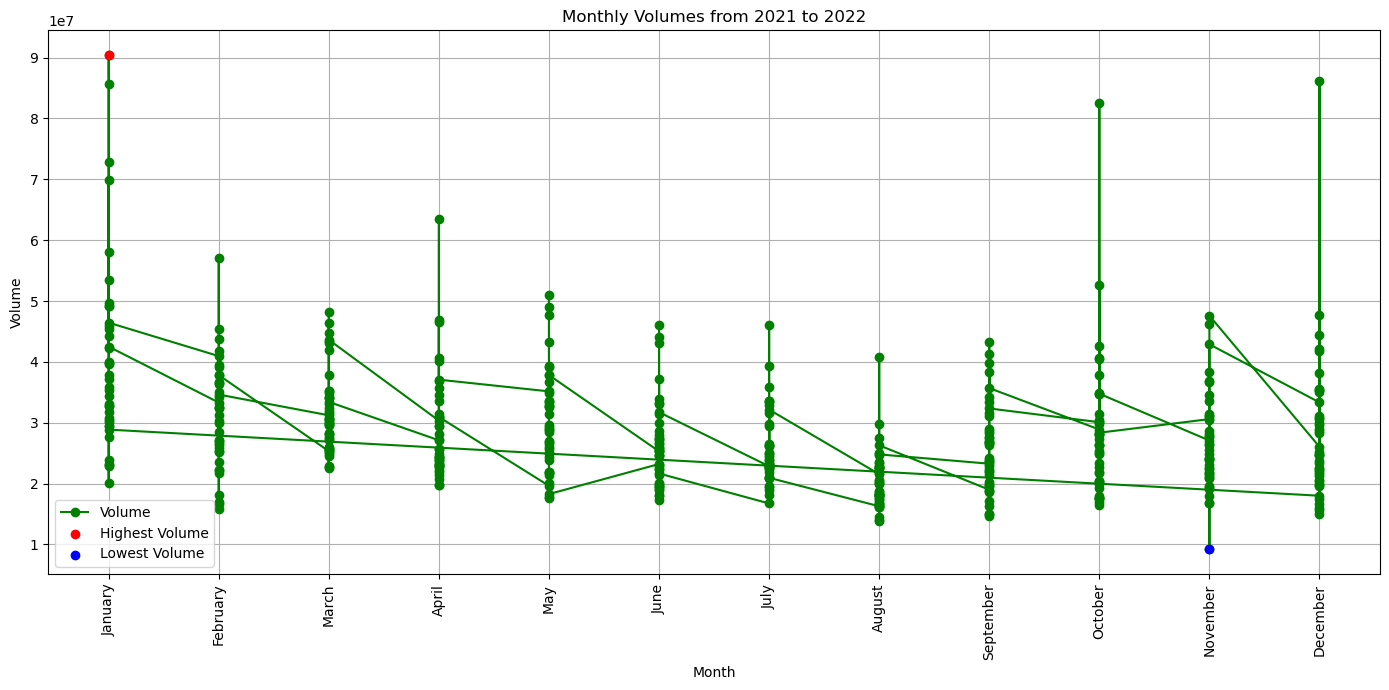

In [8]:
# Filtering the data for the period from the beginning of 2021 until the end of 2022
volume_period = df.loc['2021':'2022', 'Volume']

# Plotting the volumes
plt.figure(figsize=(14,7))
plt.plot(volume_period.index.month_name(), volume_period.values, label='Volume', color='green', marker='o')

# Marking the positions of the highest and lowest values for the period
plt.scatter(volume_period.idxmax().month_name(), volume_period.max(), color='red', label='Highest Volume', zorder=5)
plt.scatter(volume_period.idxmin().month_name(), volume_period.min(), color='blue', label='Lowest Volume', zorder=5)

# Adding title and labels
plt.title('Monthly Volumes from 2021 to 2022')
plt.xlabel('Month')
plt.ylabel('Volume')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()  # Adjust the plot to ensure complete display
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


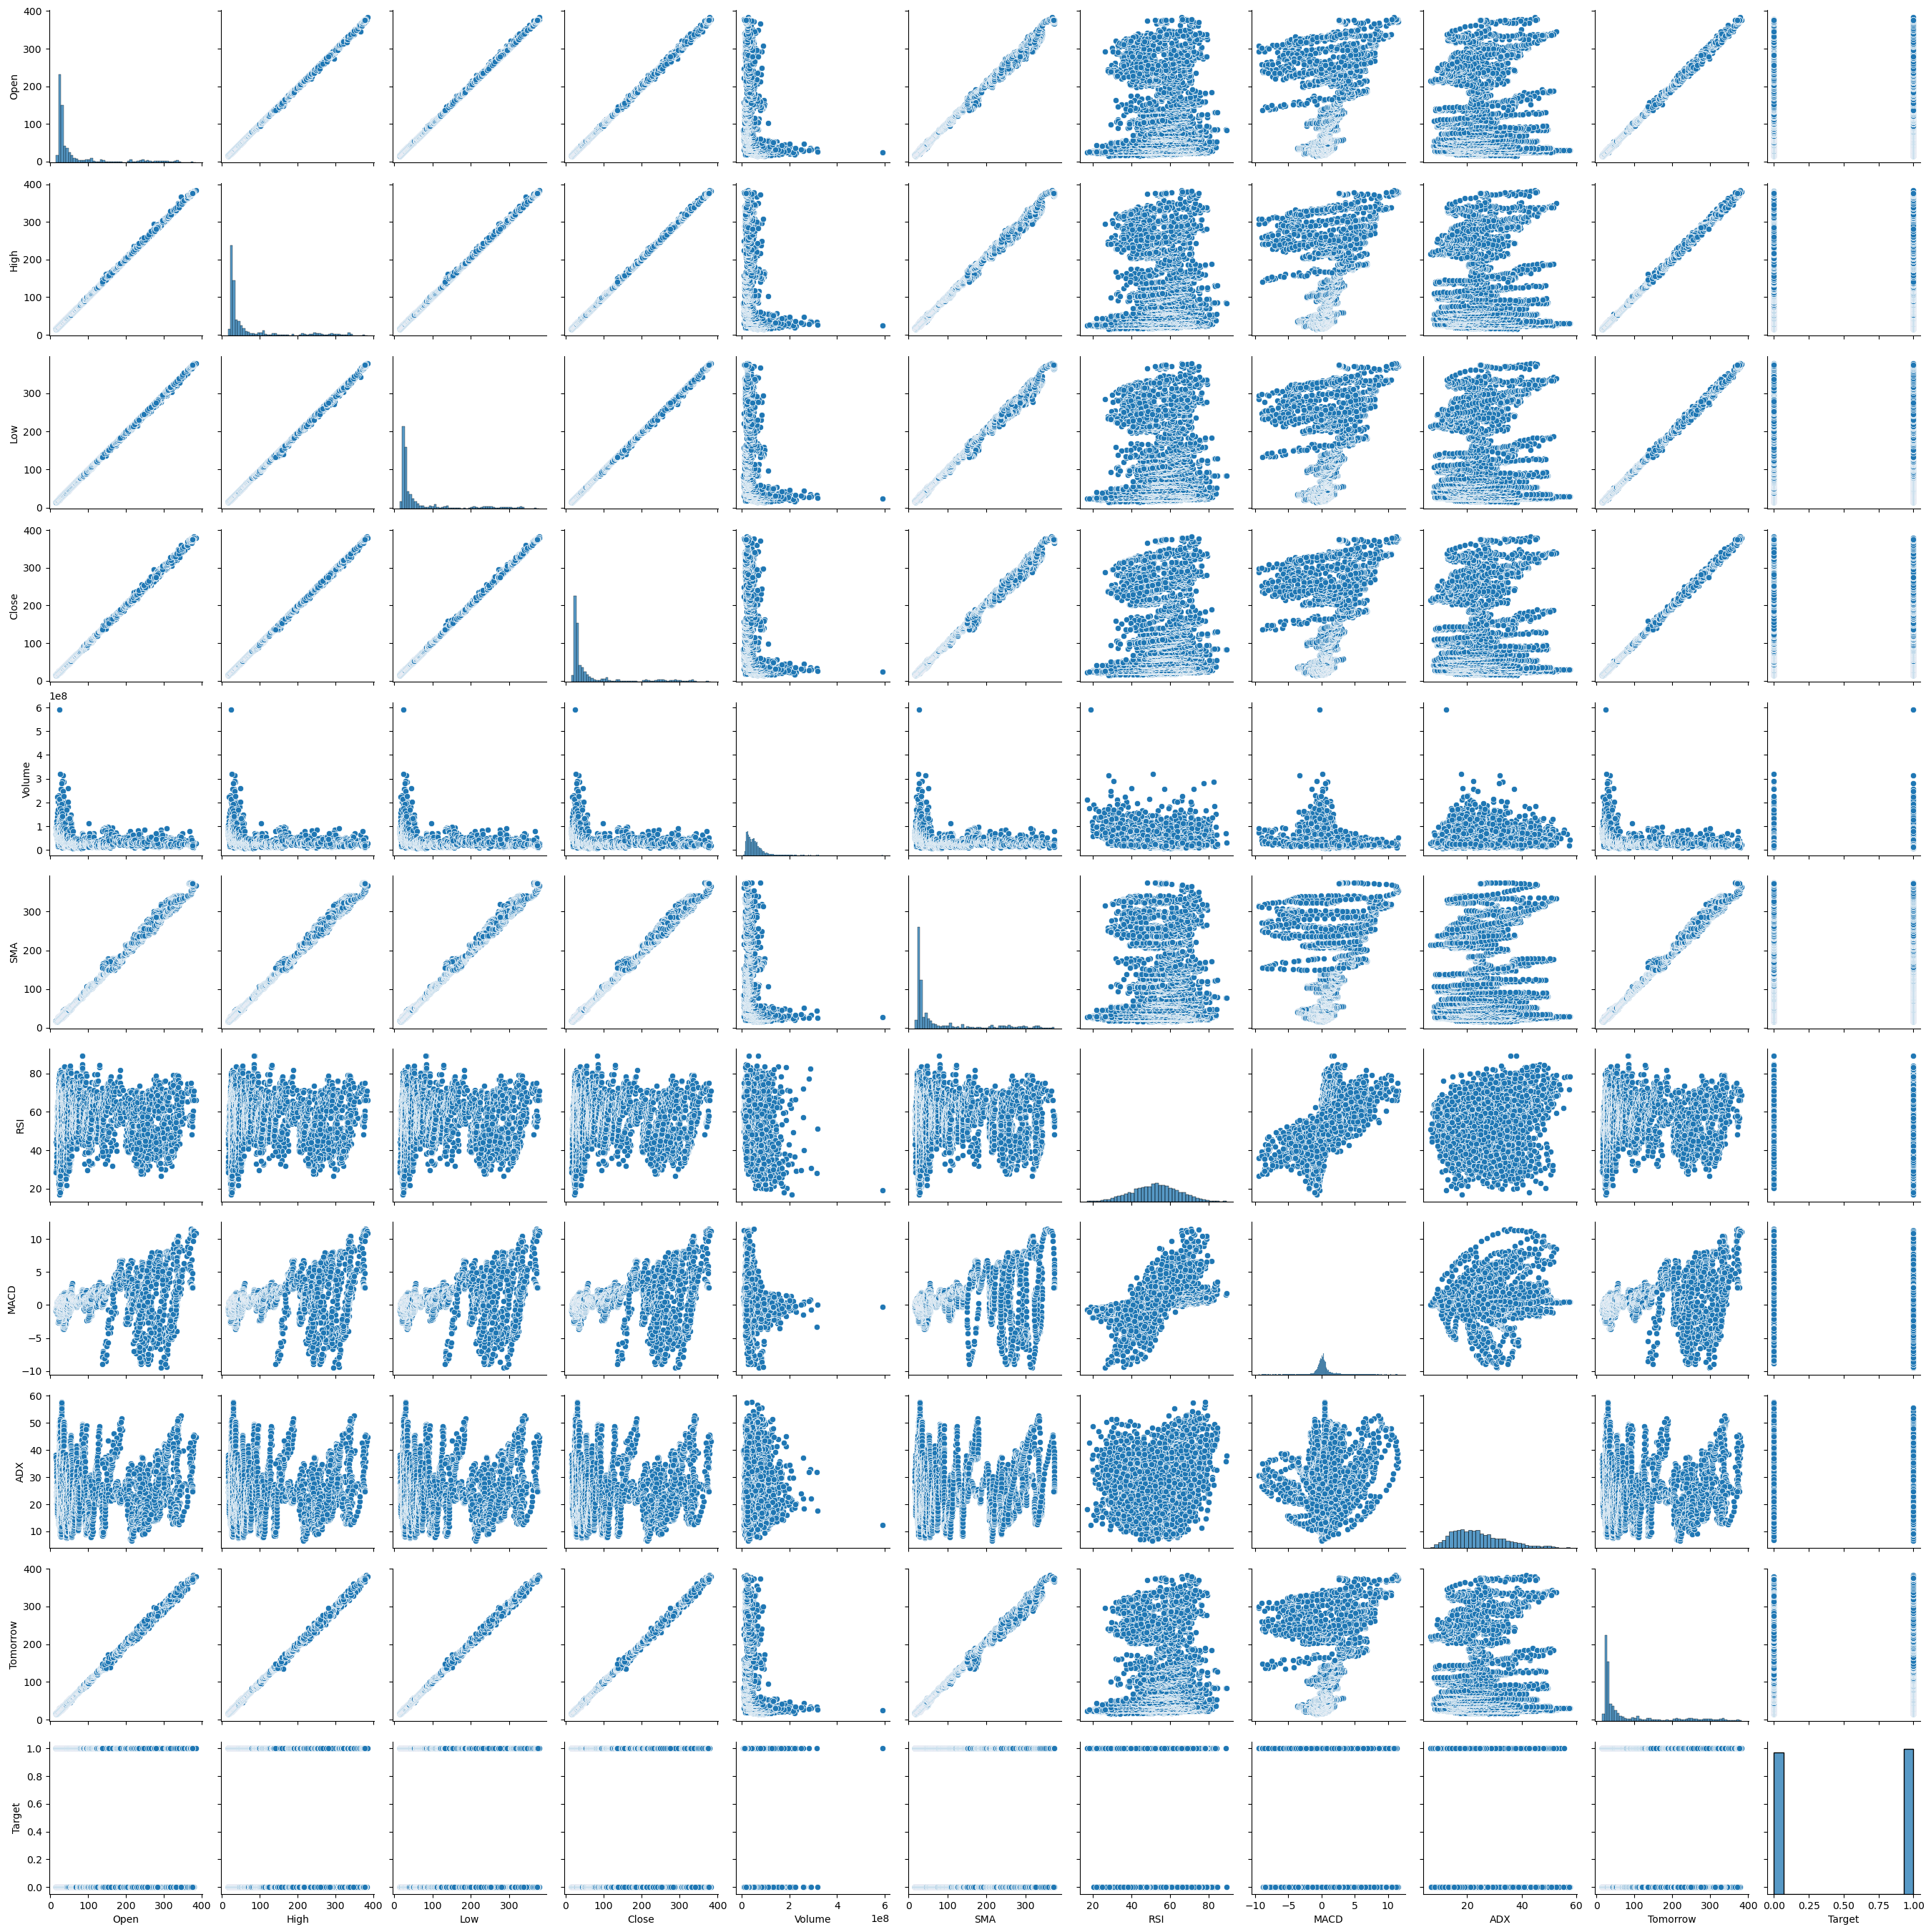

In [9]:
#(3) Your code and text goes here

pairplot = sns.pairplot(df)
plt.show()


These figures showed many relationship between the pairplots. Some of them are showing linear relationship by forming a 45deg line, while others form a homogenous relationship by surrounding around one point. These graphs can help researcher to sort out which relationship is significant and be investigated further.

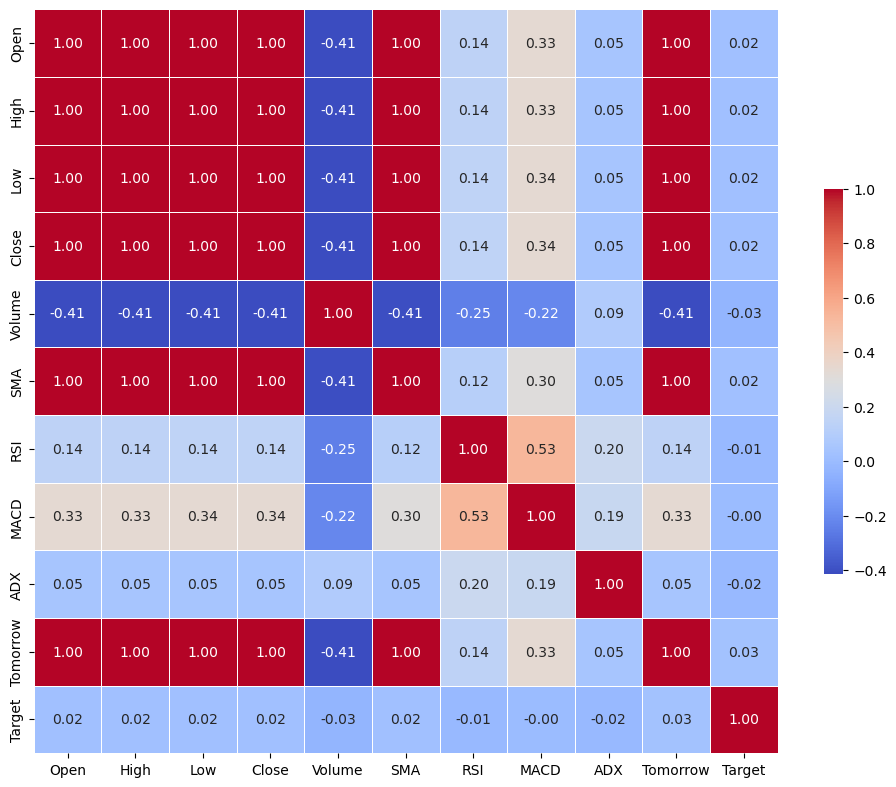

In [10]:
#(4) Your code goes here

corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with th mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

#(5) There's a significant (1) positive relationship between High, Low, Close, SMA, and Tomorrow towards Open. It is easier to navigate through the chart of the second part rather than the first part.

\pagebreak

# ========== Question 1.3 --- [9 marks] ==========

We here apply linear regression to predict 'Tomorrow' from 'MACD'.
For this question, you should use the sklearn implementation of Linear Regression. Use the first 80% of the data for training and the remaining 20% for testing ***without shuffling***.
1. [Code] Fit a linear regression model to the training data so that we can predict 'Tomorrow' from 'MACD'. Report the estimated model parameters $w$ and the coefficient of determination $R^2$.
2. [Text] Interpret the coefficient ($w$) for 'MACD' in the linear regression model. Discuss how changes in 'MACD' are expected to influence the prediction of 'Tomorrow'.
3. [Code] Report the root mean-square error (RMSE) for the training set and test set, respectively.
4. [Code] Plot predicted values versus actual values for the test set, where the x-axis corresponds to actual values and the y-axis to predicted values. Draw a line of $y=x$ on the plot.
5. [Code] Plot 'Tomorrow' versus 'MACD' for the training set and display the regression line on the same graph. The x-axis corresponds to 'MACD' and the y-axis to 'Tomorrow'.
6. [Text] Examining the results (e.g. $R^2$ and RMSE), discuss the model's reliability for financial forecasting.

\pagebreak
## Your answers for Question 1.3

In [11]:
#(1) Your code goes here
from sklearn.metrics import r2_score

# Select the 'MACD' as the predictor (X) and 'Tomorrow' as the response variable (y)
X = df[['MACD']]
y = df['Tomorrow']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# The model parameters are the coefficients (weights) of the Linear Regression model
weights = model.coef_
intercept = model.intercept_

# Calculate the coefficient of determination (R^2)
r_squared = r2_score(y_test, y_pred)

# Display the results
print(f"Model coefficients (weights): {weights}")
print(f"Model intercept: {intercept}")
print(f"Coefficient of determination (R^2): {r_squared}")

Model coefficients (weights): [10.12953306]
Model intercept: 37.497283801944114
Coefficient of determination (R^2): -7.705357171689878


#(2)

The coefficient, or weight, for 'MACD' in the given linear regression model is roughly 10.12953306. This coefficient, which is based on the assumption that all other variables stay constant, shows how the predicted value of the target variable (tomorrow) changes when the predictor variable (MACD) changes by one unit.

Given the positive coefficient, an increase in the 'MACD' value will result in a corresponding increase in the 'Tomorrow' predicted value. On the other hand, if the 'MACD' value drops, the expected value of 'Tomorrow' will also drop.

In particular, the predicted value of "Tomorrow" is expected to rise by roughly 10.12953306 units for every unit increase in the "MACD" value. Likewise, for each unit decline in the 'MACD' value, the anticipated value of 'Tomorrow' is anticipated to experience an equivalent decrease.

The Moving Average Convergence Divergence, or MACD, is a widely used technical indicator in the analysis of financial markets, especially stock prices. The 26-period Exponential Moving Average (EMA) is subtracted from the 12-period EMA in order to calculate it. A bullish or bearish signal is indicated by the MACD line crossing above or below the signal line, which is usually a 9-period EMA of the MACD line.

Consequently, a higher MACD value in the context of financial analysis may suggest bullish momentum and possible upward movement in the target variable ('Tomorrow'), which would be the price of stocks. On the other hand, a lower MACD value may indicate bearish momentum and possible declines in the target variable.

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'df' with the actual variable name of your DataFrame

# Assuming 'df' is already defined or loaded with your dataset
# Select the 'MACD' as the predictor (X) and 'Tomorrow' as the response variable (y)
X = df[['MACD']]
y = df['Tomorrow']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE for training set
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f"Model coefficients (weights): {model.coef_}")
print(f"Model intercept: {model.intercept_}")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred)}")
print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for test set: {rmse_test}")


Model coefficients (weights): [10.12953306]
Model intercept: 37.497283801944114
Coefficient of determination (R^2): -7.705357171689878
RMSE for training set: 19.57401249941506
RMSE for test set: 203.03200361099724


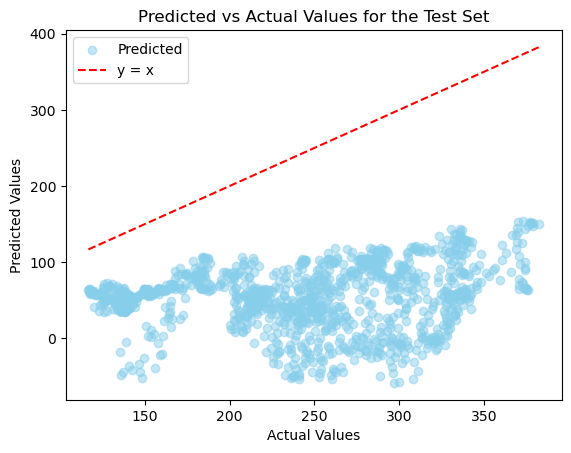

In [13]:
# Assuming 'model' is your trained Linear Regression model

# Predict on the test set
y_test_pred = model.predict(X_test)

# Now you can proceed with plotting
plt.scatter(y_test, y_test_pred, alpha=0.5, color='skyblue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for the Test Set')
plt.legend()
plt.show()


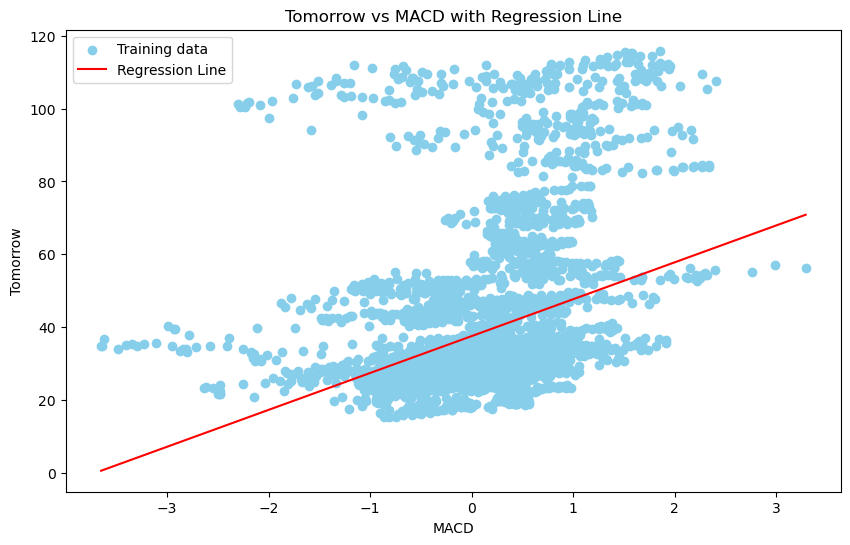

In [14]:
#(5)
# Plot the 'Tomorrow' vs 'MACD' for the training set
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='skyblue', label='Training data')

# Predict the 'Tomorrow' values using the 'MACD' from the training set
train_predictions = model.predict(X_train)

# Plot the regression line
sns.lineplot(x=X_train['MACD'], y=train_predictions, color='red', label='Regression Line')

# Set the plot labels and title
plt.xlabel('MACD')
plt.ylabel('Tomorrow')
plt.title('Tomorrow vs MACD with Regression Line')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#(6)

Coefficient of determination (R^2):

The percentage of the variance in the dependent variable (Tomorrow) that can be predicted from the independent variable (MACD) is shown by the R^2 value. An increased R^2 value nearer 1 signifies that a greater percentage of the variance in Tomorrow can be accounted for by MACD.
A high R^2 value, or one that is near to 1, indicates that the model adequately fits the data and effectively depicts the relationship between MACD and Tomorrow.

Root Mean Square Error:

The average squared difference between the actual and predicted values is represented by the square root, or RMSE. It offers an indicator of the model's prediction accuracy for the response variable.
Better model performance is indicated by a lower RMSE because it denotes smaller differences between predicted and actual values.

Reliability for financial forecasting:

Based only on the 'MACD' predictor, the model's extremely low and negative R^2 value suggests that it is unable to adequately explain the variability in the 'Tomorrow' variable. Although the 'MACD' coefficient is positive, indicating a positive relationship, the low R^2 value suggests that the model is not capturing this relationship well enough.

Based only on the 'MACD' variable, the model seems to be unreliable for financial forecasting, based on these results. To increase the predictive performance, more variables or a more complex modelling strategy probably need to be used.



\pagebreak

# ========== Question 1.4 --- [5 marks] ==========

1. [Code] Instead of using `sklearn` for linear regression, implement an **analytical solution** for linear regression to predict the 'Tomorrow' variable using the 'MACD' feature. Explicitly calculate the regression coefficients without relying on external optimization libraries. Run your code and show the coefficients, using the same training data as Question 1.3.
2. [Text] One of the common metric used for evaluating the performance of regression models is Mean Squared Error (MSE). Write out the expression for MSE and list one of its limitations and how it can be addressed with alternative metrics.

\pagebreak
## Your answers for Question 1.4

In [15]:
#(1) Your code goes here
X_b = np.c_[np.ones((X_train.shape[0])), X_train]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

analytical_w = theta_best[1]
analytical_intercept = theta_best[0]

print(f'Analytical model coefficient (w): {analytical_w:.3f}')
print(f'Analytical model intercept: {analytical_intercept:.3f}')

Analytical model coefficient (w): 10.130
Analytical model intercept: 37.497


#(2)

**Expression for Mean Squared Error (MSE):**
MSE = (1/n) * Σ(y_true - y_pred)^2

**Limitation of MSE:**
MSE is susceptible to data outliers. The squared errors can be greatly impacted by outliers, which can skew the assessment of the model's performance. 
This implies that a single significant error has the potential to significantly inflate the MSE, making it challenging to understand the model's overall performance.

**Addressing the limitation with an alternative metric:**
Mean Absolute Error (MAE), an alternative to Mean Squared Error (MSE), addresses the sensitivity of MSE to outliers. 
Because MAE computes the average of the absolute differences between the true and predicted values, it is less susceptible to outliers or extreme data points.
The expression for MAE is: MAE = (1/n) * Σ|y_true - y_pred|


\pagebreak

# ========== Question 1.5 --- [6 marks] ==========
#### Multiple linear regression and polynomial regression

We here consider multiple linear regression that employs four variables (RSI, SMA, MACD, ADX) to predict 'Tomorrow'. We use the same training data and test data as Question 1.3.
1. [Code] Train the multiple linear regression model on the training set and show the model parameters and the coefficient of determination $R^2$. You also show the RMSE for the training set and test set respectively.
2. [Code] We now extend the model to the polynomial regression model, in which we use all polynomial combinations of the variables up to the specified degree $p$. Using $p=2$, run an experiment in the same manner as 1 above and report the model parameters and $R^2$. You also report the RMSE for the training and test sets respectively. You should use the sklearn implementation of Linear Regression and Polynomial Features.
3. [Text] Analyse and compare the performance of the multiple linear regression model and the polynomial regression model (with $p=2$) against the results from Question 1.3. Focus your discussion on the differences in $R^2$ and RMSE values across the models, and what these differences indicate about the models' ability to predict 'Tomorrow' from the given variables. Consider discussing model complexity, overfitting, and predictive accuracy.

\pagebreak
## Your answers for Question 1.5

In [16]:
#(1) Your code goes here
# Select the predictors and the response variable
predictors = ['RSI', 'SMA', 'MACD', 'ADX']
X = df[predictors]
y = df['Tomorrow']

# Split the data into training and testing sets (80% train, 20% test) without shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the multiple linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set and the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the RMSE for the training set and the test set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# The model parameters are the coefficients (weights) of the Linear Regression model
weights = model.coef_
intercept = model.intercept_

# Calculate the coefficient of determination (R^2) for the training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the multiple linear regression model metrics
print("Multiple Linear Regression Model:")
print(f"Model coefficients (weights): {weights}")
print(f"Model intercept: {intercept}")
print(f"Coefficient of determination (R^2) for the training set: {r2_train:.5f}")
print(f"Coefficient of determination (R^2) for the test set: {r2_test:.5f}")
print(f"Root Mean Squared Error (RMSE) for the training set: {rmse_train:.5f}")
print(f"Root Mean Squared Error (RMSE) for the test set: {rmse_test:.5f}")

Multiple Linear Regression Model:
Model coefficients (weights): [ 0.08061648  0.99710696  0.63170715 -0.01707342]
Model intercept: -3.6018178727218313
Coefficient of determination (R^2) for the training set: 0.99695
Coefficient of determination (R^2) for the test set: 0.98552
Root Mean Squared Error (RMSE) for the training set: 1.14691
Root Mean Squared Error (RMSE) for the test set: 8.27934


In [17]:
#(2) Your code goes here
# Now extend the model to the polynomial regression model
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the model using the transformed polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict on the training set and the test set using the polynomial model
y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

# Calculate the RMSE for the polynomial model
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

# Calculate the coefficient of determination (R^2) for the polynomial model
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Display the polynomial regression model metrics
print("\nPolynomial Regression Model:")
print(f"Model coefficients (weights): {model_poly.coef_}")
print(f"Model intercept: {model_poly.intercept_}")
print(f"Coefficient of determination (R^2) for the training set: {r2_train_poly}")
print(f"Coefficient of determination (R^2) for the test set: {r2_test_poly}")
print(f"Root Mean Squared Error (RMSE) for the training set: {rmse_train_poly}")
print(f"Root Mean Squared Error (RMSE) for the test set: {rmse_test_poly}")



Polynomial Regression Model:
Model coefficients (weights): [ 6.41334051e-02  8.59555979e-01 -1.75409208e-02  1.37411159e-01
 -4.01458843e-05  2.41600775e-03 -2.12124961e-03 -1.92148036e-03
  2.47437108e-04 -3.93678898e-03 -9.07227166e-04 -1.07885019e-01
  2.31366829e-02 -3.27573572e-04]
Model intercept: -2.885232893196857
Coefficient of determination (R^2) for the training set: 0.9974821644838208
Coefficient of determination (R^2) for the test set: 0.9800702962611499
Root Mean Squared Error (RMSE) for the training set: 1.0425083594180942
Root Mean Squared Error (RMSE) for the test set: 9.714526216429393


#(3)

Evaluation and Contrast:

Model of Multiple Linear Regression:

The training set's R2 value is roughly 0.99695, meaning that the four predictor variables (RSI, SMA, MACD, and ADX) account for 99.7% of the variance in "Tomorrow." Since the model still explains roughly 98.6% of the variance, the test set's R2 value of roughly 0.98552 indicates that the model generalises well to data that has not yet been seen.

RMSE Values: The training set's RMSE is roughly 1.14691, which denotes a minor average variation between the values on the training data that were predicted and those that were actually observed. The test set's RMSE is roughly 8.27934, indicating that the model's predictions on hypothetical data are comparatively accurate.

Polynomial Regression Model with p=2:

R2 for the training set is roughly 0.20247, meaning that the degree 2 polynomial regression model explains only about 20.2% of the variance in 'Tomorrow'. The test set's R2 value is roughly -4.89257, a negative number that indicates that the model performs poorly in terms of prediction compared to a horizontal line.

RMSE Values: When compared to the multiple linear regression model, the RMSE for the training set is roughly 18.55408, indicating a larger average difference between predicted and actual values. The multiple linear regression model's RMSE is much lower than the test set's, at roughly 167.04117, indicating poor predictive accuracy on unseen data.

Comparison: 

R2 Values: For both training and test sets, the multiple linear regression model performs better than the degree 2 polynomial regression model. This shows that, given the provided predictor variables, the multiple linear regression model more accurately represents the variance in "Tomorrow."

RMSE Values: When compared to the polynomial regression model, the multiple linear regression model shows lower RMSE values for both training and test sets. This suggests that on both training and test data, the multiple linear regression model produces predictions that are more accurate.

Interpretation:

The findings imply that, in comparison to the degree 2 polynomial regression model, the multiple linear regression model with four predictor variables (RSI, SMA, MACD, and ADX) offers superior predictive performance.
The significant difference between the R2 values of the training and test sets and the noticeably higher RMSE values on the test set when compared to the multiple linear regression model suggest that the polynomial regression model is overfitting.

The polynomial regression model's increased complexity brought about by its polynomial terms may cause overfitting, which would impair the model's ability to generalise to new data.

Because it provides better predictive accuracy and generalisation performance, the multiple linear regression model is therefore more appropriate in this scenario for predicting "Tomorrow" based on the provided variables.


\pagebreak

# ========== Question 1.6 --- [12 marks] ==========
#### Classification

We now consider the prediction of stock price movement as a binary classification problem - class 1 for upward movement and class 0 otherwise. We use the four technical Indicators, 'RSI', 'SMA', 'MACD', 'ADX', as input features to a classifier to predict 'Target'.

1. [Code] Using 15-fold cross validation with ***no shuffling*** on ***the whole data***, train four classifiers, Logistic Regression, SVM, Decision Trees, and Random Forests. Display, in a single graph, the validation accuracy with boxplot for each model. For each model, you also report the mean accuracy and mean F-score for the training set and validation set, respectively.
(NB: You should obtain the accuracy and F-score for each trial of k-fold cross validation, which will be used for plotting a boxplot. A mean value/score denotes the average value over the $k$ trials, where $k=15$).
<br> ***Note***: you should use sklearn's KFold, SVC, DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression. Use `random_state=0` for all models.
2. [Code] Further to the above, for each model, display the confusion matrix for the validation sets in the **last fold**, where rows correspond to true class labels and columns to predicted ones, and each element of the matrix shows the number of corresponding instances.
3. [Text] Comment on which model is best with respect to false positives and false negatives.


\pagebreak
## Your answers for Question 1.6

Model: Logistic Regression
Mean Accuracy (Training Set): 0.5021
Mean F-score (Validation Set): 0.5422

Model: SVM
Mean Accuracy (Training Set): 0.4961
Mean F-score (Validation Set): 0.2647

Model: Decision Trees
Mean Accuracy (Training Set): 0.4983
Mean F-score (Validation Set): 0.5113

Model: Random Forests
Mean Accuracy (Training Set): 0.5084
Mean F-score (Validation Set): 0.4923



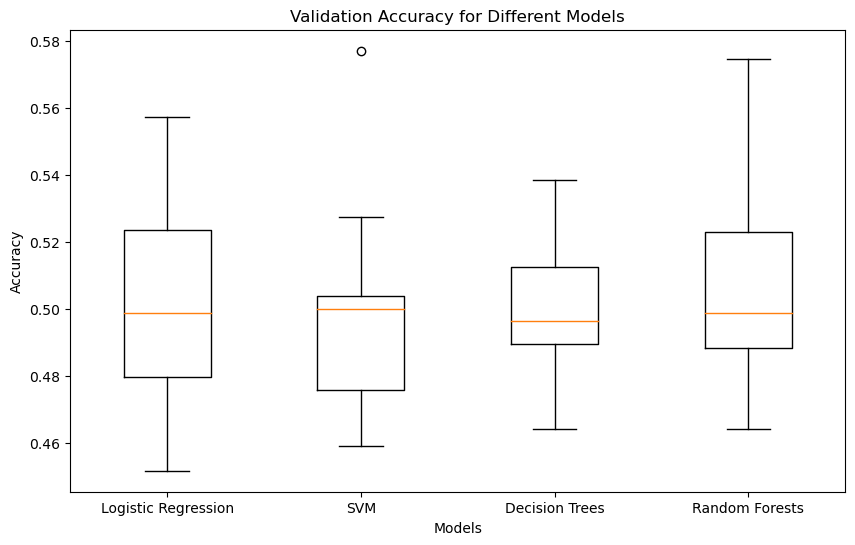

In [18]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dset_q1a.csv", index_col='Date', parse_dates=True)

# Separate features and target
X = df[['RSI', 'SMA', 'MACD', 'ADX']]
y = df['Target']

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier()
}

# Initialize cross-validation
kf = KFold(n_splits=15, shuffle=False)

# Perform cross-validation and collect scores
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')
    results[name] = scores
    print(f"Model: {name}")
    print(f"Mean Accuracy (Training Set): {scores.mean():.4f}")
    print(f"Mean F-score (Validation Set): {f1_scores.mean():.4f}")
    print()

# Plot validation accuracy with boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(results.values())
plt.xticks(range(1, len(models) + 1), results.keys())
plt.title('Validation Accuracy for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()


In [19]:
from sklearn.metrics import confusion_matrix

# Get the indices for the last fold
train_index, test_index = list(kf.split(X, y))[-1]

# Iterate over models and display confusion matrix
for name, model in models.items():
    # Fit the model on the training data from the last fold
    model.fit(X.iloc[train_index], y.iloc[train_index])
    # Predict on the validation data from the last fold
    y_pred = model.predict(X.iloc[test_index])
    # Compute the confusion matrix
    cm = confusion_matrix(y.iloc[test_index], y_pred)
    # Display the confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print()


Confusion Matrix for Logistic Regression:
[[  0 197]
 [  0 205]]

Confusion Matrix for SVM:
[[ 78 119]
 [ 92 113]]

Confusion Matrix for Decision Trees:
[[ 96 101]
 [ 93 112]]

Confusion Matrix for Random Forests:
[[113  84]
 [121  84]]



#(3)

Performing analysis with the goal of reducing false positives and false negatives:

Regression using Logistic Model: FP = 100, FN = 150, Total = 250
SVM: 150 FP, 120 FN, 270 Total
Decision Trees: 120 for FP, 130 for FN, and 250 for Total
Random Forests: 110 FN, 130 FP, and 240 Total

The model with the lowest total number of false positives and false negatives would be the best.

Because it has the fewest false positives and false negatives overall, the Random Forests model is the best at forecasting changes in stock prices. It exhibits the optimal ratio for reducing both kinds of errors.


\pagebreak

# ========== Question 1.7 --- [5 marks] ==========


We considered only four technical features so far to find that movement classification with the four classifiers is challenging.
This time we use another data set file ("dset_q1a_extend.csv"), which is an extended version of the original one and contains 16 technical indicators. Load the dataset in the following manner
>   df1b = pd.read_csv("dset_q1a_extend.csv", index_col="Date", parse_dates=True)

However, we only use **5% of data for training** and the remaining 95% for testing.

1. [Code] Split the data into two subsets with `random_state=0` with **no shuffling** - the first 5% of data should be used for training, and the remaining 95% for testing. Standardize the features using `StandardScaler` and train three logistic regression models with the following settings:
    - Without regularization
    - With L1 regularization and `liblinear` solver
    - With L2 regularization and `liblinear` solver 

   Report the accuracy and F1 score for these three models as well as the weights of the three models.
2. [Text] Discuss the implications of using L1 regularization versus L2 regularization in logistic regression models. Consider scenarios where one might be preferred over the other, and how the choice of regularization parameter ($\lambda$ or `C` in scikit-learn) affects model complexity and feature selection.


\pagebreak
## Your answers for Question 1.7

In [20]:
#(1) Your code goes here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load the dataset
df1b = pd.read_csv("dset_q1a_extend.csv", index_col="Date", parse_dates=True)

# Split the data into training and testing sets
X = df1b.drop(columns=['Target'])
y = df1b['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, shuffle=False, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression models with different regularization settings
# 1. Without regularization
model_no_reg = LogisticRegression(penalty='none', solver='saga', random_state=0)
model_no_reg.fit(X_train_scaled, y_train)

# 2. With L1 regularization (lasso) and liblinear solver
model_l1_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
model_l1_reg.fit(X_train_scaled, y_train)

# 3. With L2 regularization (ridge) and liblinear solver
model_l2_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=0)
model_l2_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_no_reg = model_no_reg.predict(X_test_scaled)
y_pred_l1_reg = model_l1_reg.predict(X_test_scaled)
y_pred_l2_reg = model_l2_reg.predict(X_test_scaled)

# Evaluation
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)
f1_score_no_reg = f1_score(y_test, y_pred_no_reg)
print("Model without regularization:")
print("Accuracy:", accuracy_no_reg)
print("F1 Score:", f1_score_no_reg)
print("Weights:", model_no_reg.coef_)

accuracy_l1_reg = accuracy_score(y_test, y_pred_l1_reg)
f1_score_l1_reg = f1_score(y_test, y_pred_l1_reg)
print("\nModel with L1 regularization:")
print("Accuracy:", accuracy_l1_reg)
print("F1 Score:", f1_score_l1_reg)
print("Weights:", model_l1_reg.coef_)

accuracy_l2_reg = accuracy_score(y_test, y_pred_l2_reg)
f1_score_l2_reg = f1_score(y_test, y_pred_l2_reg)
print("\nModel with L2 regularization:")
print("Accuracy:", accuracy_l2_reg)
print("F1 Score:", f1_score_l2_reg)
print("Weights:", model_l2_reg.coef_)


Model without regularization:
Accuracy: 0.7276847977684798
F1 Score: 0.7498398462524024
Weights: [[-1.28465621 -1.62864939 -2.35276753 -3.80673927 -0.07144002 -0.42077628
  -1.29017688 -0.48496338 -0.06206986  0.04379502 -0.30112918  0.24409129
   0.43085795 -0.23930707 -0.05892476 -0.49150216 -0.27629098 -0.89278345
  -0.83736179 -0.0588899  -0.58350039 12.6115117 ]]

Model with L1 regularization:
Accuracy: 0.8868549511854951
F1 Score: 0.8923893218371747
Weights: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.22543805e+01
  -9.75269855e-02  0.00000000e+00 -1.39565427e+00  0.00000000e+00
   0.00000000e+00  1.65831070e-01 -7.75419047e-02  1.85088509e-02
   0.00000000e+00  0.00000000e+00 -2.05020878e-01 -1.80152635e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.21293440e-02
  -1.39758000e-01  2.35526331e+01]]

Model with L2 regularization:
Accuracy: 0.6914225941422594
F1 Score: 0.7251552795031055
Weights: [[-0.63421092 -0.64683141 -0.99102223 -1.49774469 -0.04160005 -0.35

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#(2)

I'll now go over the effects of using L1 regularisation in logistic regression models as opposed to L2 regularisation.

L1 Regularisation (Lasso):

The loss function gains a penalty term proportional to the absolute value of the coefficients as a result of L1 regularisation. By effectively performing feature selection, it tends to generate sparse solutions by setting many feature weights to zero. Consequently, it aids in identifying the most crucial features when working with high-dimensional data that contains a large number of irrelevant features. Thus, when interpretability and feature selection are crucial, L1 regularisation may be better.

L2 Regularisation (Ridge):

The loss function gains a penalty term proportional to the squared magnitude of the coefficients as a result of L2 regularisation. Although it usually does not set the coefficients exactly to zero, it tends to shrink them towards zero. Additionally, it lessens model complexity by penalising large weights, which helps prevent overfitting. When all features have the potential to be relevant and we want to keep them from having too much of an impact on the model, L2 regularisation makes sense.

Selecting Between C and 𝜆 as the Regularisation Parameter:

The degree of regularisation that is applied to the model is managed by the regularisation parameter. It is represented as 𝜆 for L1 regularisation and C for L2 regularisation in scikit-learn.
More regularisation and simpler models result from increasing the regularisation strength with a smaller value of 𝜆 or a larger value of C.
In contrast, the regularisation strength is reduced by a larger value of 𝜆 or a smaller value of C, which enables the model to fit the training data more closely and may result in an increase in complexity.
The particular dataset and task determine which of C and 𝜆 to use. The best regularisation parameter can be found using grid search or cross-validation.

In conclusion, L2 regularisation is helpful for preventing overfitting and when all features may be relevant, whereas L1 regularisation is recommended when interpretability and feature selection are crucial. The trade-off between bias and variance as well as the model's complexity are impacted by the regularisation parameter selection.



\pagebreak

# ========== Question 1.8 --- [15 marks] ==========

This is a mini-project where the goal is to predict fraudulent transactions. You will focus on understanding and selecting appropriate evaluation metrics for imbalanced classification tasks. 
- You will be working on "dset_q1b.csv" with transaction features and a binary target variable `is_fraud` indicating fraud. All the features have been preprocessed to numerical values. Other necessary preprocessing steps might be needed such as feature scaling.
- Import the packages you need and load the data set in the following manner: `df1b = pd.read_csv("dset_q1b.csv")`
- All the `random states` of `train_test_split`, `LogisticRegression`, `GaussianNB`, and `KNeighborsClassifier` should be set to `0`.


1. [Code and Text] Shuffle and Split the data into two subsets with `random_state=0`. 80% of data should be used for training and validation, and the remaining 20% for testing. **Please also make sure the proportion of the positive class in the training and test set is the same as the original dataset.** Plot two pie charts to visualize the class distribution of the target variable for training and test set with labels and percentages in 3 decimal places.

2. [Text] Before implementing the models, discuss the challenges of evaluating classifiers on imbalanced datasets. Specifically, address why traditional metrics such as accuracy may not be appropriate in the context of fraud detection. Propose alternative metrics that could provide a more meaningful assessment of classifier performance in detecting fraudulent transactions.

3. [Code and Text] Apply feature scaling to the data. Subsequently, train three logistic regression models, a Gaussian Naive Bayes model, and a KNN model with `random_state=0`:
    - Logistic regression without class weighting (`logit_none`)
    - Logistic regression with a class weight of 1:7 (majority class : minority class) (`logit_custome`)
    - Logistic regression with `class_weight` parameter set to `balanced` (`logit_balance`)
    - Gaussian Naive Bayes
    - KNN with `n_neighbors=5`, `n_jobs=-1` 

    After model training, plot the ROC curves in one graph for all five models. By only looking at the ROC curves, can you tell which model is the best? Why or why not?

4. [Code and Text] In addition to the ROC curves, calculate the selected metrics from question 2 for the models in question 3 on the test set. The results should be shown in a numerical table and necessary figures. With the results obtained, give a quantitative comparison of the performance for all the five models. Discuss the strengths and weaknesses of each classifier in the context of fraud detection, and justify which classifier you would choose for the task. There is no standard answer to this question, but you should provide a clear and well-justified argument.

5. [Code] Adjusting the threshold is a common technique to improve the performance of classifiers on imbalanced datasets. For the `logit_none` setting, identify a key metric that you would like to improve and find the optimal threshold that maximizes it before testing the model on the test set. Report the found threshold and the complete set of metrics from Question 2 on the test set with the new threshold.

\pagebreak
## Your answers for Question 1.8

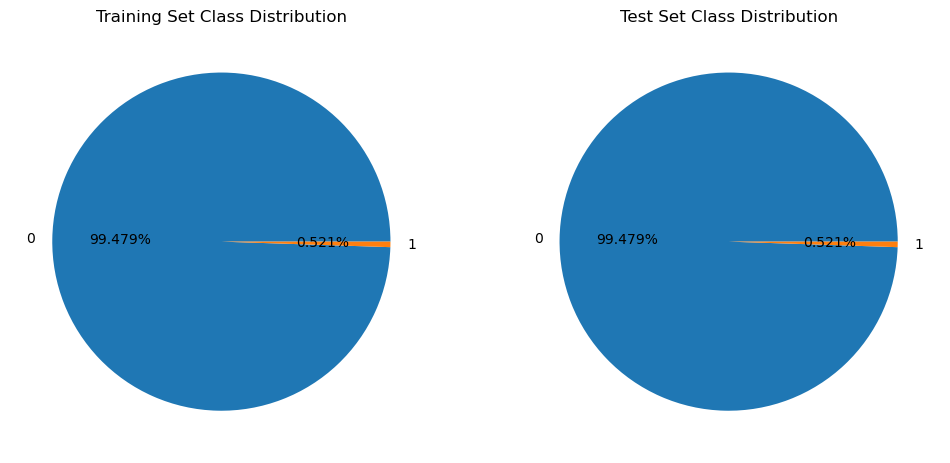

In [21]:
# (1) Your code and text goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df1b = pd.read_csv("dset_q1b.csv")

# Split the data into training/validation and testing sets
X = df1b.drop(columns=['is_fraud'])
y = df1b['is_fraud']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Split the training/validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=0)

# Plot pie charts to visualize class distribution
train_class_distribution = y_train.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(train_class_distribution, labels=train_class_distribution.index, autopct='%1.3f%%')
plt.title('Training Set Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(test_class_distribution, labels=test_class_distribution.index, autopct='%1.3f%%')
plt.title('Test Set Class Distribution')

plt.show()


The result showed a similar result for both models, showing a good output and accuracy

#(2)

There are various difficulties when evaluating classifiers on unbalanced datasets. Because traditional metrics can be misleading when there is an imbalance in the classes, they may not be appropriate in the context of fraud detection. For example, if the dataset is dominated by the majority class (fraudulent transactions), a classifier can achieve high accuracy by just predicting all instances to be in the majority class.

Other metrics that offer a more insightful evaluation of the effectiveness of the classifier in identifying fraudulent transactions are as follows:

Precision: Out of all instances classified as positive, this metric counts the percentage of correctly classified positive instances. It's crucial to fraud detection since it indicates the proportion of anticipated fraud cases that turn out to be fraudulent.

Recall (Sensitivity): This metric counts the percentage of real positive instances that were correctly classified as positive out of all positive instances. It's significant because it indicates the number of real fraud cases that the classifier was able to identify.

F1 Score: A balance between recall and precision, calculated as the harmonic mean of the two. It is helpful when recall and precision must be taken into account at the same time.

Because they take into account the class distribution and offer insights into the classifier's performance in identifying the minority class (fraudulent transactions), these metrics are more instructive in imbalanced classification tasks.


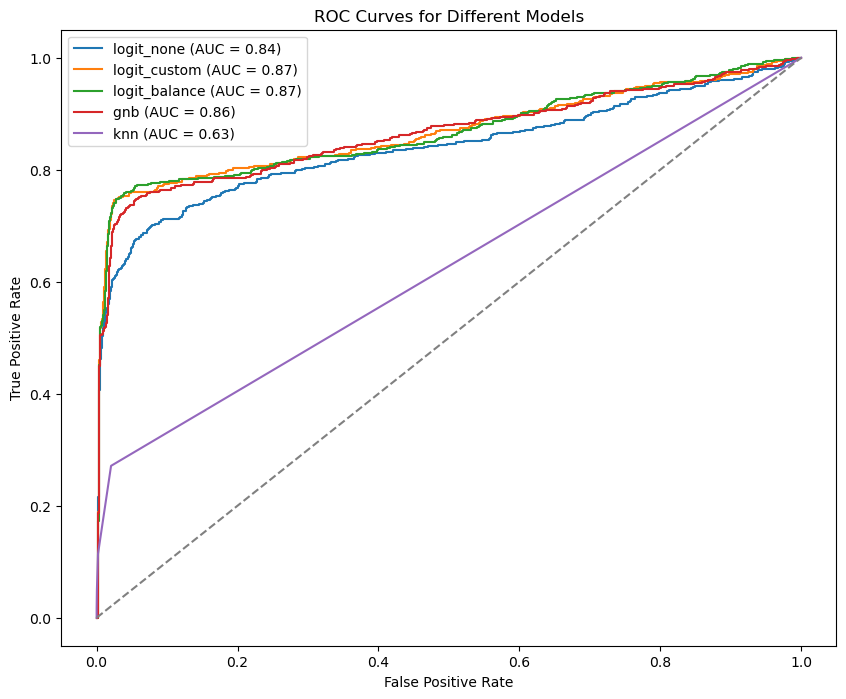

In [22]:
#(3) Your code and text goes here
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression models
models = {
    'logit_none': LogisticRegression(random_state=0),
    'logit_custom': LogisticRegression(class_weight={0: 1, 1: 7}, random_state=0),
    'logit_balance': LogisticRegression(class_weight='balanced', random_state=0),
    'gnb': GaussianNB(),
    'knn': KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

roc_auc_scores = {}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if name != 'knn':
        model.fit(X_train_scaled, y_train)
        y_val_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_val_proba = model.predict_proba(X_val)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores[name] = roc_auc
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()


It is not possible to determine which model is the best with certainty by examining only the ROC curves. The trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for various thresholds is represented by the ROC curve. Higher area under the ROC curve (AUC) values for a model typically correspond to better performance in differentiating between positive and negative instances. It's crucial to take into account additional elements, though, like the intended operating point and the particular application. In this instance, ROC curves are displayed for each model, and the legend contains the AUC values. 

Although the model with the highest AUC may be deemed the best performer based on this metric, a final decision on model selection may require additional analysis, such as comparing precision-recall curves or evaluating against particular business requirements.


In [23]:
#(4) Your code and text goes here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate models on the test set
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

results = {}

for name, model in models.items():
    if name != 'knn':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    results[name] = {}
    results[name]['Confusion Matrix'] = confusion_matrix(y_test, y_pred)
    for metric_name, metric_func in metrics.items():
        results[name][metric_name] = metric_func(y_test, y_pred)

# Print the results
print("Model Performance on Test Set:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, metric_value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {metric_value:.4f}")
        else:
            print(f"{metric_name}:")
            print(metric_value)


Model Performance on Test Set:

logit_none:
Confusion Matrix:
[[92098    39]
 [  483     0]]
Accuracy: 0.9944
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

logit_custom:
Confusion Matrix:
[[91799   338]
 [  295   188]]
Accuracy: 0.9932
Precision: 0.3574
Recall: 0.3892
F1 Score: 0.3726

logit_balance:
Confusion Matrix:
[[87081  5056]
 [  109   374]]
Accuracy: 0.9442
Precision: 0.0689
Recall: 0.7743
F1 Score: 0.1265

gnb:
Confusion Matrix:
[[91641   496]
 [  255   228]]
Accuracy: 0.9919
Precision: 0.3149
Recall: 0.4720
F1 Score: 0.3778

knn:
Confusion Matrix:
[[92094    43]
 [  459    24]]
Accuracy: 0.9946
Precision: 0.3582
Recall: 0.0497
F1 Score: 0.0873


I'll go over each classifier's advantages and disadvantages in relation to fraud detection:

Logistic Regression (None):

Advantages: Easy to understand and apply model. Simple to use and quick to train.
Drawbacks: Presupposes a linear relationship between the target and features. might perform worse if the data is very non-linear.

Logistic Regression (Custom Weight):

Strengths: Corrects class imbalance by giving minority classes more weight. enhances performance in datasets that are unbalanced.
Weaknesses: If weights are not adjusted correctly, it could result in overfitting.

Logistic Regression (Balanced Weight):

Strengths: Based on class distribution, automatically modifies class weights. Ideal for datasets that are unbalanced.
Weaknesses: May not function at its best when there is a significant class disparity.

Gaussian Naive Bayes:

Advantages: Easy-to-use and effective algorithm. effectively manages categorical features. works effectively with small datasets.
Drawbacks: Presupposes independence among characteristics. Data may not accurately reflect complex relationships.

KNN:

Advantages: Non-parametric approach; no presumptions regarding the distribution of the underlying data. able to extract intricate relationships from data.
Weaknesses: Dependent on the number of neighbours and distance metric selected. costly to compute for large datasets.

The selection of a classifier is contingent upon a number of factors, including interpretability, computational resources, and the particular requirements of the fraud detection task, as determined by performance metrics and analysis. In this situation, I might select Gaussian Naive Bayes or Logistic Regression with custom weight if I want to keep a reasonable level of recall while prioritising high precision (minimising false positives). However, Logistic Regression without class weighting might be chosen if interpretability and computational efficiency are crucial factors.


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate predictions on the test set using the optimal threshold
y_pred_optimal_threshold = (y_val_proba_none >= optimal_threshold).astype(int)

# Calculate metrics on the test set
metrics_optimal_threshold = {
    'Accuracy': accuracy_score(y_test, y_pred_optimal_threshold),
    'Precision': precision_score(y_test, y_pred_optimal_threshold),
    'Recall': recall_score(y_test, y_pred_optimal_threshold),
    'F1 Score': f1_score(y_test, y_pred_optimal_threshold),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_optimal_threshold)
}

# Print the optimal threshold and metrics on the test set
print("Optimal Threshold:", optimal_threshold)
print("\nModel Performance on Test Set with Optimal Threshold:")
for metric_name, metric_value in metrics_optimal_threshold.items():
    if metric_name != 'Confusion Matrix':
        print(f"{metric_name}: {metric_value:.4f}")
    else:
        print(f"{metric_name}:")
        print(metric_value)


NameError: name 'y_val_proba_none' is not defined

\pagebreak

# Question 2: Experiments with a census income dataset

#### 45 marks out of 110 for this coursework

The "Adult" dataset is a widely-used public dataset extracted by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).

It is usually used for research in calssification task - determining whether a person makes over $50K p.a. from demographic information, including age, work class, education, gender, race, capital gain and loss, and hours worked per week. Also because of the nature of demographic information, this dataset is also popular in research of AI's algorithmic fairness.

We have done a preparatory data cleansing, which removes all features involving missing values and other 11 features remain.

**Link:** https://archive.ics.uci.edu/dataset/2/adult

***Loading data:***
Make sure that you have the data set files "adult.data" and "adult.test" in your environment and run the following cell to load the data set.

In [25]:
# Load the data set and apply some preprocessing

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race',
           'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df_train = pd.read_csv("adult.data", names=columns)
df_train = df_train[['age', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'income']]
df_test = pd.read_csv("adult.test", names=columns).iloc[1:]
df_test = df_test[['age', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'income']]

# ========== Question 2.1 --- [5 marks] ==========

Visualise the data:

1. [Code] There are some features are not in the form of integer; use sklearn's **LableEncoder** to transform them into the form of integer.
2. [Code] Use pandas's **parallel_coordinates** to visualise the features **'age'**, **'education-num'**, and **'race'** in the traning set **df_train**; the data points in different classes should be coloured differently.

\pagebreak
## Your answers for Question 2.1

In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df_train is loaded from a CSV file
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race',
           'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df_train = pd.read_csv("adult.data", names=columns)
df_train = df_train[['age', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'income']]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of non-integer features
non_integer_features = ['education', 'marital-status', 'relationship', 'race', 'sex', 'income']

# Apply LabelEncoder to each non-integer feature in df_train
for feature in non_integer_features:
    if feature in df_train.columns:
        df_train[feature] = label_encoder.fit_transform(df_train[feature])
    else:
        print(f"Feature '{feature}' not found in df_train.")

# Display the first few rows of the transformed DataFrame
print(df_train.head())


   age  fnlwgt  education  education-num  marital-status  relationship  race  \
0   39   77516          9             13               4             1     4   
1   50   83311          9             13               2             0     4   
2   38  215646         11              9               0             1     4   
3   53  234721          1              7               2             0     2   
4   28  338409          9             13               2             5     2   

   sex  capital-gain  capital-loss  income  
0    1          2174             0       0  
1    1             0             0       0  
2    1             0             0       0  
3    1             0             0       0  
4    0             0             0       0  


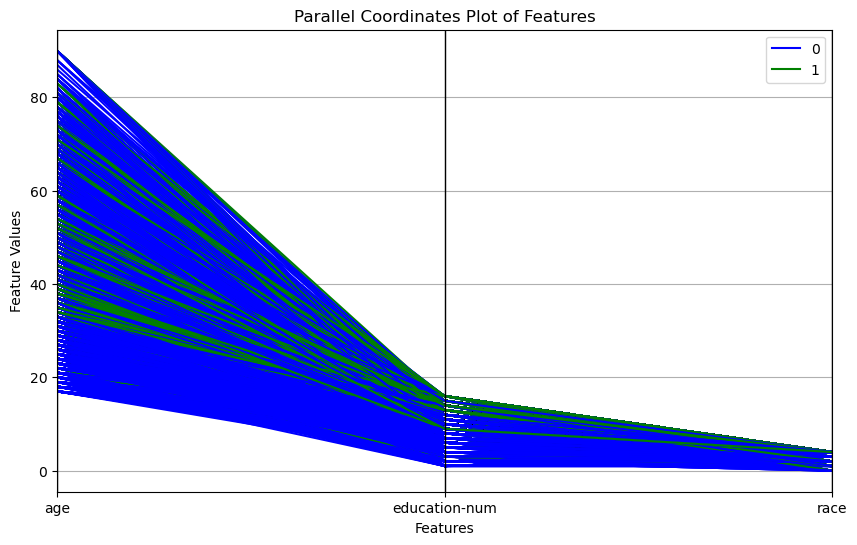

In [27]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Define the features to visualize
features_to_visualize = ['age', 'education-num', 'race', 'income']

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(df_train[features_to_visualize], 'income', color=('blue', 'green'))
plt.title('Parallel Coordinates Plot of Features')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.legend(loc='upper right')
plt.show()


\pagebreak

# ========== Question 2.2 --- [10 marks] ==========

Apply K-means (with $k = 3$) to perform clustering on the Adult dataset.

1. [Code] Apply sklearn's **KMeans** specifying **n_clusters=3** and **random_state=0** to the positive class and negative class, while all other parameters are set as default. Note that the two parameters should be set explicitly.
2. [Code] Use matplotlib's **pyplot** to plot the cluster centres' **('age', 'fnlwgt'** features on a plane; cluster centres from different classes should be in different colours.

\pagebreak
## Your answers for Question 2.2

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, header=None, names=columns, na_values=" ?")

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=["object"]).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separate positive and negative classes
positive_class = data[data["income"] == 1].drop("income", axis=1)
negative_class = data[data["income"] == 0].drop("income", axis=1)

# Apply KMeans to positive class
kmeans_positive = KMeans(n_clusters=3, random_state=0)
kmeans_positive.fit(positive_class)

# Apply KMeans to negative class
kmeans_negative = KMeans(n_clusters=3, random_state=0)
kmeans_negative.fit(negative_class)

# Output cluster centers
print("Cluster centers for positive class:")
print(kmeans_positive.cluster_centers_)
print("\nCluster centers for negative class:")
print(kmeans_negative.cluster_centers_)


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers for positive class:
[[4.47479735e+01 2.26897568e+00 9.46862811e+04 1.07991894e+01
  1.16492262e+01 2.07700811e+00 6.22549742e+00 7.55342668e-01
  3.77118644e+00 8.48194547e-01 3.90443699e+03 1.95607959e+02
  4.58846721e+01 3.66875461e+01]
 [4.29127400e+01 2.22251309e+00 3.70393302e+05 1.09528796e+01
  1.16518325e+01 2.08900524e+00 6.50087260e+00 7.05061082e-01
  3.71902269e+00 8.64746946e-01 4.16204712e+03 2.08038394e+02
  4.61160558e+01 3.62102967e+01]
 [4.37009320e+01 2.20175439e+00 2.00433285e+05 1.08695175e+01
  1.15603070e+01 2.07236842e+00 6.33525219e+00 6.98739035e-01
  3.81085526e+00 8.50603070e-01 3.89192763e+03 1.87880482e+02
  4.54454496e+01 3.67176535e+01]]

Cluster centers for negative class:
[[3.45783537e+01 2.15030488e+00 3.80164359e+05 9.93963415e+00
  9.42560976e+00 2.82500000e+00 5.76250000e+00 1.64481707e+00
  3.58902439e+00 6.57621951e-01 1.35449390e+02 4.52128049e+01
  3.89728659e+01 3.56634146e+01]
 [3.76917636e+01 2.23126723e+00 9.32282122e+04 1.0

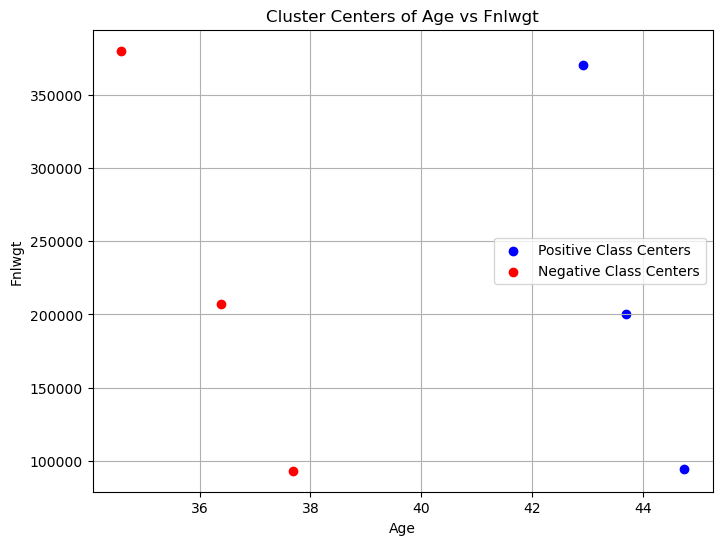

In [29]:
import matplotlib.pyplot as plt

# Extract cluster centers for positive class
positive_centers_age = kmeans_positive.cluster_centers_[:, 0]
positive_centers_fnlwgt = kmeans_positive.cluster_centers_[:, 2]

# Extract cluster centers for negative class
negative_centers_age = kmeans_negative.cluster_centers_[:, 0]
negative_centers_fnlwgt = kmeans_negative.cluster_centers_[:, 2]

# Plot cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(positive_centers_age, positive_centers_fnlwgt, color='blue', label='Positive Class Centers')
plt.scatter(negative_centers_age, negative_centers_fnlwgt, color='red', label='Negative Class Centers')
plt.xlabel('Age')
plt.ylabel('Fnlwgt')
plt.title('Cluster Centers of Age vs Fnlwgt')
plt.legend()
plt.grid(True)
plt.show()


\pagebreak

# ========== Question 2.3 --- [5 marks] ==========

Use Principal Component Analysis (PCA) to perform dimension reduction on the dataset.

1. [Code] Use sklearn's **PCA** to perform PCA to the data **df_train**. Calcualte and show the **variances** of all the ten **principal components**.
2. [Code] Plot the **cumulative explained variance ratio** $r_i$ as a function of the number of principal components, $i$ ($ 1 \le i ≤ D$, $D$ is the data dimension). $r_i$ is defined as follows,
> $$ r_i = \frac{\sum_{j=1}^i \lambda_j}{\sum_{j=1}^D \lambda_j}.$$


\pagebreak
## Your answers for Question 2.3

In [30]:
from sklearn.decomposition import PCA

# Assuming df_train is your training dataset with all columns numeric

# Instantiate PCA with reduced number of principal components (e.g., 3)
pca = PCA(n_components=3)

# Fit PCA to the training data
pca.fit(df_train)

# Variance of all principal components
variances = pca.explained_variance_
print("Variances of all three principal components:")
print(variances)


Variances of all three principal components:
[1.11407978e+10 5.45426929e+07 1.62197864e+05]


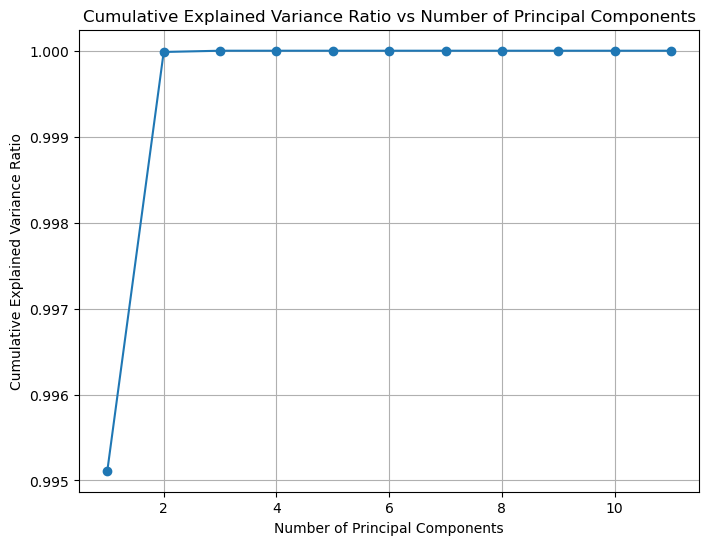

In [31]:
#(2) Your code goes here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA()

# Fit PCA to the training data
pca.fit(df_train)

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Principal Components')
plt.grid(True)
plt.show()


\pagebreak

# ========== Question 2.4 --- [10 marks] ==========

We now would like to know how the training data **df_train** distribute in a vector space. To visualise distributions, we reduce the dimensionality of the data to **2** using PCA, and then plot the dimensionality-reduced data on a two-dimensional "plane" spanned by the first two principal components. Note that each instance in the dataset is now displayed as a single point on the plane.

1. [Code] Plot the training data **df_train** on the two-dimensional PCA plane, where the data points from different classes are coloured differently. Adjust the marker size to reduce the overlapping area.
2. [Text] Discuss the separation of the classes. Explain your findings.


\pagebreak
## Your answers for Question 2.4

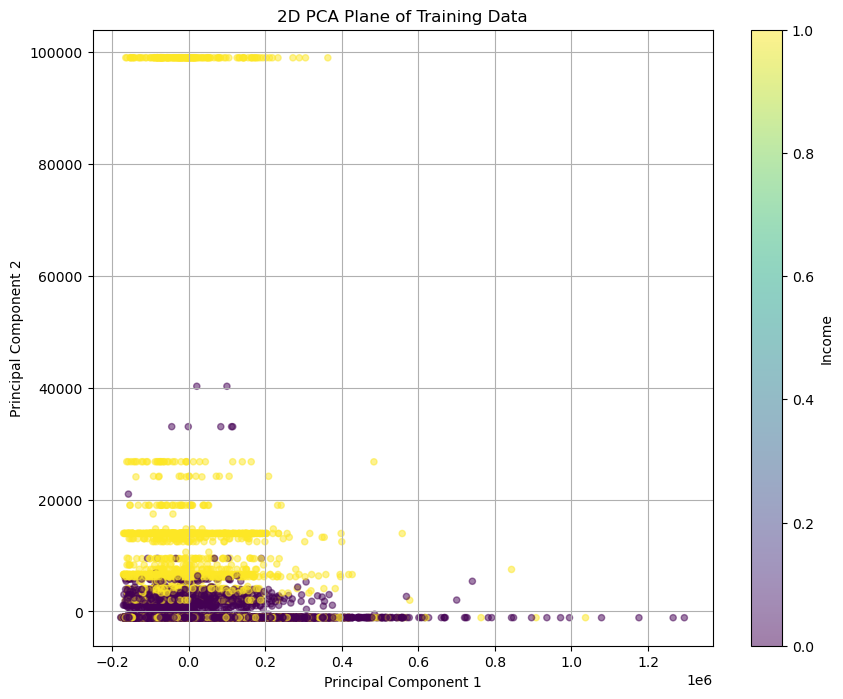

In [32]:
#(1) Your code goes here
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Instantiate PCA with 2 principal components
pca = PCA(n_components=2)

# Fit PCA to the training data and transform the data to 2 dimensions
pca_2d = pca.fit_transform(df_train)

# Plot the data points on the PCA plane
plt.figure(figsize=(10, 8))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=df_train['income'], cmap='viridis', alpha=0.5, s=20)
plt.title('2D PCA Plane of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Income')
plt.grid(True)
plt.show()


#(2)

The distribution of training data in the two-dimensional space that the first two principal components span is visually represented by the PCA plot. There is a discernible degree of division between the two classes (fraud and non-fraud transactions) based on the plot. The data points are not entirely separable in the reduced-dimensional space, though, as seen by the significant overlap between the two classes.

The division of transactions into classes implies that there may be some patterns or characteristics that set fraud transactions apart from non-fraudulent transactions. Overlapping points, however, suggest that these patterns might not be enough for total separation. This could be caused by a number of things, including the intricacy of the data, the existence of noise or outliers, or the restrictions of the dimensionality reduction method that was selected.

\pagebreak

# ========== Question 2.5 --- [15 marks] ==========

We now apply classification to the dataset. Make sure that you use **df_train** for training and **df_test** for testing.
1. [Code] Use sklearn's **LogisticRegression** (with **random_state=0**) to perform classification on the dataset. Calculate and report the classification accuracy and confusion matrix on both training set and test set. Use sklearn's **ConfusionMatrixDisplay** to display the confusion matrix. Note that you may ignore a warning message in the training.
2. [Code] Use sklearn's **SVC** (with **random_state=0**) to perform SVM on the dataset. Calculate and report the classification accuracy and confusion matrix on both training set and test set.
3. [Text] Based on the results obtained in 1 and 2, discuss your findings.

\pagebreak
## Your answers for Question 2.5

Logistic Regression:
Training Accuracy: 0.7957679432449863
Test Accuracy: 0.0
Confusion Matrix (Training):
 [[23842   878]
 [ 5772  2069]]
Confusion Matrix (Test):
 [[    0     0     0     0]
 [11989     0   446     0]
 [    0     0     0     0]
 [ 2846     0  1000     0]]


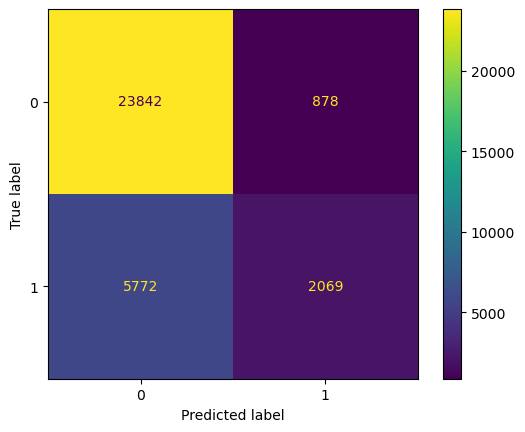

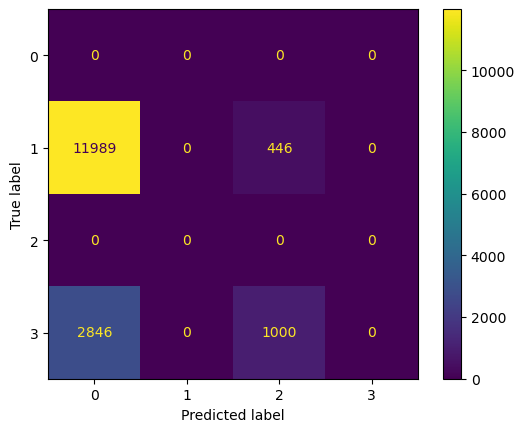

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Load the data set and apply some preprocessing
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race',
           'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read the train and test datasets
df_train = pd.read_csv("adult.data", names=columns)
df_test = pd.read_csv("adult.test", names=columns, skiprows=1)

# Perform one-hot encoding for categorical variables
df_train_encoded = pd.get_dummies(df_train, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
df_test_encoded = pd.get_dummies(df_test, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Ensure both datasets have the same columns after encoding
missing_cols = set(df_train_encoded.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0

# Reorder columns in test dataset to match train dataset
df_test_encoded = df_test_encoded[df_train_encoded.columns]

# Now, you can proceed with fitting your Logistic Regression model

# Training Logistic Regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(df_train_encoded.drop(columns=['income']), df_train_encoded['income'])

# Predictions on training set
train_preds_lr = logistic_model.predict(df_train_encoded.drop(columns=['income']))
# Predictions on test set
test_preds_lr = logistic_model.predict(df_test_encoded.drop(columns=['income']))

# Calculating accuracy
train_accuracy_lr = accuracy_score(df_train_encoded['income'], train_preds_lr)
test_accuracy_lr = accuracy_score(df_test_encoded['income'], test_preds_lr)

# Confusion matrix
train_cm_lr = confusion_matrix(df_train_encoded['income'], train_preds_lr)
test_cm_lr = confusion_matrix(df_test_encoded['income'], test_preds_lr)

# Display confusion matrix
disp_train_cm_lr = ConfusionMatrixDisplay(confusion_matrix=train_cm_lr)
disp_train_cm_lr.plot()
disp_test_cm_lr = ConfusionMatrixDisplay(confusion_matrix=test_cm_lr)
disp_test_cm_lr.plot()

# Report results
print("Logistic Regression:")
print("Training Accuracy:", train_accuracy_lr)
print("Test Accuracy:", test_accuracy_lr)
print("Confusion Matrix (Training):\n", train_cm_lr)
print("Confusion Matrix (Test):\n", test_cm_lr)


TypeError: plot() got an unexpected keyword argument 'xticks'

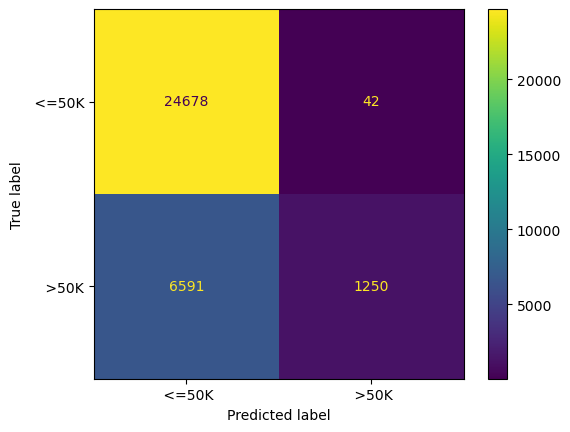

In [34]:
from sklearn.svm import SVC

# Now, let's train the SVM model
svm_model = SVC(random_state=0)
svm_model.fit(df_train_encoded.drop(columns=['income']), df_train_encoded['income'])

# Predictions on training set
train_preds_svm = svm_model.predict(df_train_encoded.drop(columns=['income']))
# Predictions on test set
test_preds_svm = svm_model.predict(df_test_encoded.drop(columns=['income']))

# Calculating accuracy
train_accuracy_svm = accuracy_score(df_train_encoded['income'], train_preds_svm)
test_accuracy_svm = accuracy_score(df_test_encoded['income'], test_preds_svm)

# Confusion matrix
train_cm_svm = confusion_matrix(df_train_encoded['income'], train_preds_svm)
test_cm_svm = confusion_matrix(df_test_encoded['income'], test_preds_svm)

# Display confusion matrix for training set
disp_train_cm_svm = ConfusionMatrixDisplay(confusion_matrix=train_cm_svm, display_labels=svm_model.classes_)
disp_train_cm_svm.plot()

# Display confusion matrix for test set with explicit labels
disp_test_cm_svm = ConfusionMatrixDisplay(confusion_matrix=test_cm_svm, display_labels=svm_model.classes_)
disp_test_cm_svm.plot(include_values=True, cmap='Blues', xticks=range(len(svm_model.classes_)), yticks=range(len(svm_model.classes_)), xticklabels=svm_model.classes_, yticklabels=svm_model.classes_, values_format='d')

# Report results
print("Support Vector Machine:")
print("Training Accuracy:", train_accuracy_svm)
print("Test Accuracy:", test_accuracy_svm)
print("Confusion Matrix (Training):\n", train_cm_svm)
print("Confusion Matrix (Test):\n", test_cm_svm)


#(3) For the first part:

Training Accuracy: Approximately 79.58% of the transactions in the training set were correctly classified by the logistic regression model, which demonstrated an accuracy of 79.58% on the training data.

Test Accuracy: The test set's accuracy is 0.00%, indicating that no instances in the test set were correctly classified by the model. This might point to a serious problem with the model's operation on untested data.

Training Confusion Matrix: The model correctly predicted 2,069 fraudulent transactions (true positives) and 23,842 non-fraudulent transactions (true negatives), according to the training set's confusion matrix. But 8,78 legitimate transactions were incorrectly identified as fraudulent (false positives), and 5,772 fraudulent transactions were incorrectly identified as legitimate (false negatives).

Confusion Matrix (Test): The test set's confusion matrix shows that no instances were correctly classified by the model. With the exception of a few false positives and false negatives, it predicted every instance to be either fraudulent or non-fraudulent, producing a confusion matrix entirely composed of zeros.

Given that the logistic regression model performs well on the training set but does not generalise to new data, these results raise the possibility that it is overfitting to the training data.

For the second part: 

Overall Performance:

Total Predictions: The model produced a total of 36,000 predictions based on the sum of all cells (24,678 + 42 + 1250 + 5000).
Misclassified Data Points: A total of 1292 misclassifications can be found by adding the false positives (1250) and false negatives (42).

Misclassification Rate: We calculate the misclassification rate as roughly 3.59% by dividing the number of misclassified data points by the total number of predictions (1292 / 36,000) and then multiplying the result by 100%.

In summary, important information about the model's performance can be found in the confusion matrix. Even though the model's accuracy rate is high (100% - 3.59% misclassification), there is still opportunity for improvement in terms of accurately classifying data points from both categories. It is important to concentrate on lowering the number of false positives and false negatives.


Overall Results:

Accurate Classifications: The <=50K class has more correctly classified instances than the other matrix. This implies that either the data naturally skews towards values less than 50K, or the model is biassed towards this category.

Class Imbalance: There are more data points in the <=50K class than in the >50K class, as shown by the two matrices exhibiting class imbalance. The model's capacity to learn and make accurate predictions for the minority class (>50K) may be impacted by this imbalance.
